In [1]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from salishsea_tools import tidetools
from salishsea_tools import (nc_tools,viz_tools)
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.cm as cm

from matplotlib import animation

from numpy import *
from pylab import *

import glob

In [3]:
rd = NC.Dataset('/ocean/xiaoxiny/research/Ariane/ENG3-1960s/ariane_trajectories_qualitative.nc','r');
rd_lont=rd.variables['traj_lon'][:,1::2]
rd_latt=rd.variables['traj_lat'][:,1::2]
rd_dept=rd.variables['traj_depth'][:,1::2]
rd_xs=rd.variables['init_x'][:]
rd_ys=rd.variables['init_y'][:]
print rd_lont.shape


bathy=NC.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][:,:]

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/*.nc'))
ptrc=NC.Dataset(nc_filename[0])
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]

print lon.min(),lon.max()

(731, 11)
-179.997 180.0


In [5]:
print rd_lont.min(),rd_lont.max()
#print rd_lont[:,0]

-165.580637072 145.910987545


In [6]:
# Altantic layer #1960s  #layer 40

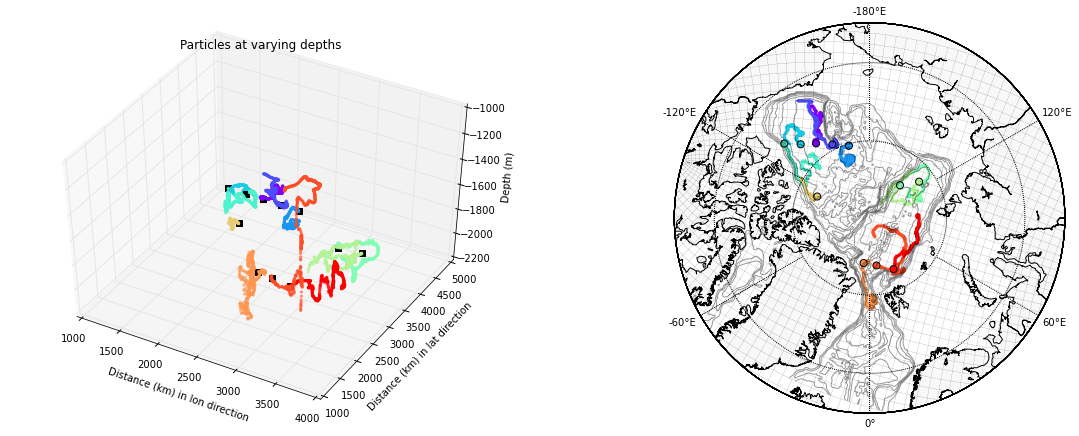

In [19]:
# 3D
n = np.arange(rd_lont.shape[1])
colors = cm.rainbow(np.linspace(0, 1, len(n)))
colors_ = cm.rainbow(np.linspace(0, 1, len(rd_xs)))


fig = plt.figure(figsize=(20,7))

ax1 = fig.add_subplot(122)
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
tracex,tracey=m(rd_lont,rd_latt)
for N,c in zip(n,colors):
    m.scatter(tracex[1:,N],tracey[1:,N],marker='o',color=c,s=3,alpha=0.5)
m.scatter(tracex[0,:],tracey[0,:],c=colors,s=50)
#for i in range (len(rd_ys)):
#    m.scatter(x_lon[rd_ys[i],rd_xs[i]],y_lat[rd_ys[i],rd_xs[i]],c=colors_[i],s=200,alpha=0.4,label='%s'%i)
    
m.contour(x_lon[420:-10,:],y_lat[420:-10,:],bathy[420:-10,:],linewidth=0.075,colors='black',alpha=0.4)
plt.legend()



ax = ax2 = fig.add_subplot(1, 2, 1, projection='3d')

for N,c in zip(n,colors):
    ax.scatter(tracex[1:,N]/1e3,tracey[1:,N]/1e3,rd_dept[1:,N],color=c,s=5,alpha=0.5) 
    ax.scatter(tracex[0,N]/1e3,tracey[0,N]/1e3,rd_dept[0,N],c='k',marker='s',s=30)
       
ax.set_xlabel('Distance (km) in lon direction')
ax.set_ylabel('Distance (km) in lat direction')
ax.set_zlabel('Depth (m)')
ax.set_title('Particles at varying depths')
ax.view_init(elev=45, azim=-60)
plt.show()

Results in 1960s.

# subsurface layer

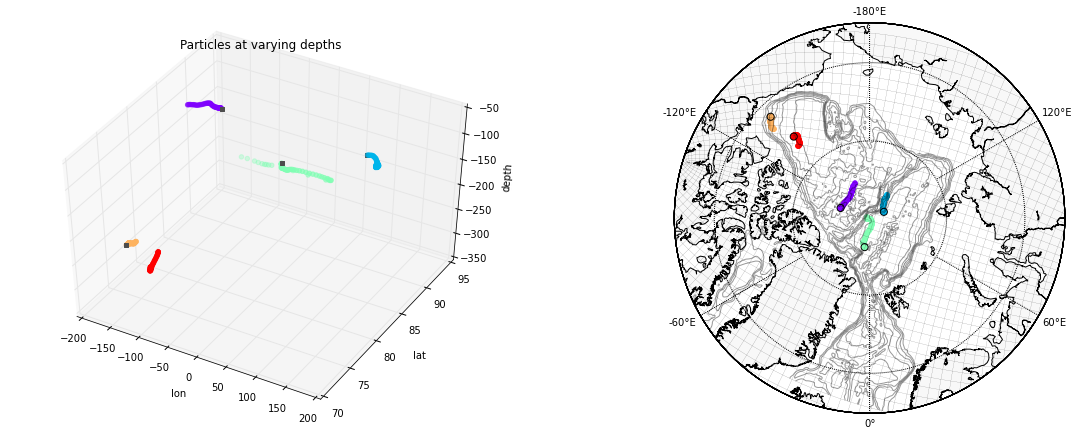

In [97]:
# 3D
n = np.arange(rd_lont.shape[1])
colors = cm.rainbow(np.linspace(0, 1, len(n)))
colors_ = cm.rainbow(np.linspace(0, 1, len(rd_xs)))


fig = plt.figure(figsize=(20,7))
ax = ax2 = fig.add_subplot(1, 2, 1, projection='3d')

for N,c in zip(n,colors):
    ax.scatter(rd_lont[1:,N],rd_latt[1:,N],rd_dept[1:,N],color=c) 
    ax.scatter(rd_lont[0,N],rd_latt[0,N],rd_dept[0,N],color='0.30',marker='s')
       
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('depth')
ax.set_title('Particles at varying depths')
ax.view_init(elev=45, azim=-60)


ax1 = fig.add_subplot(122)
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
tracex,tracey=m(rd_lont,rd_latt)
for N,c in zip(n,colors):
    m.scatter(tracex[1:,N],tracey[1:,N],marker='o',color=c)
m.scatter(tracex[0,:],tracey[0,:],c=colors,s=50)
#for i in range (len(rd_ys)):
#    m.scatter(x_lon[rd_ys[i],rd_xs[i]],y_lat[rd_ys[i],rd_xs[i]],c=colors_[i],s=200,alpha=0.4,label='%s'%i)
    
m.contour(x_lon[420:-10,:],y_lat[420:-10,:],bathy[420:-10,:],linewidth=0.075,colors='black',alpha=0.4)
plt.legend()
plt.show()

# surface

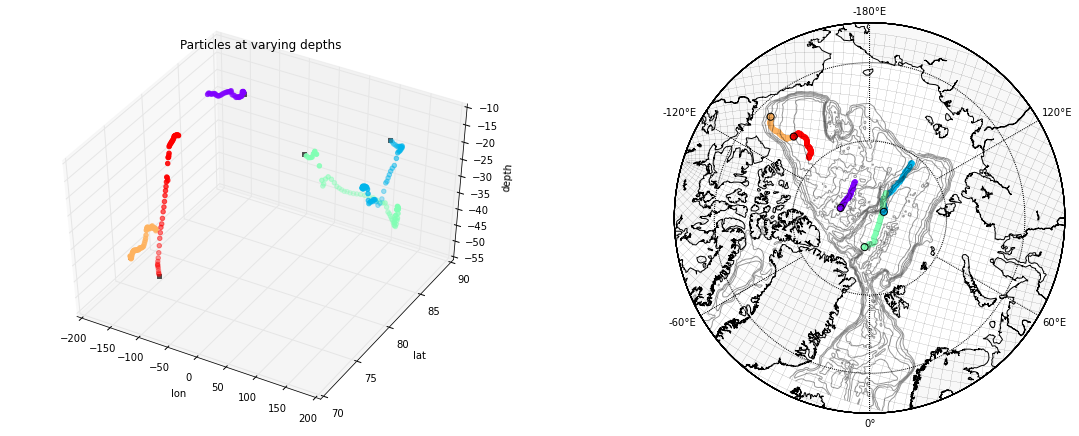

In [93]:
# 3D
n = np.arange(rd_lont.shape[1])
colors = cm.rainbow(np.linspace(0, 1, len(n)))
colors_ = cm.rainbow(np.linspace(0, 1, len(rd_xs)))


fig = plt.figure(figsize=(20,7))
ax = ax2 = fig.add_subplot(1, 2, 1, projection='3d')

for N,c in zip(n,colors):
    ax.scatter(rd_lont[1:,N],rd_latt[1:,N],rd_dept[1:,N],color=c) 
    ax.scatter(rd_lont[0,N],rd_latt[0,N],rd_dept[0,N],color='0.30',marker='s')
       
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('depth')
ax.set_title('Particles at varying depths')
ax.view_init(elev=45, azim=-60)


ax1 = fig.add_subplot(122)
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round=True)
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0, 0, 1, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
tracex,tracey=m(rd_lont,rd_latt)
for N,c in zip(n,colors):
    m.scatter(tracex[1:,N],tracey[1:,N],marker='o',color=c)
m.scatter(tracex[0,:],tracey[0,:],c=colors,s=50)
#for i in range (len(rd_ys)):
#    m.scatter(x_lon[rd_ys[i],rd_xs[i]],y_lat[rd_ys[i],rd_xs[i]],c=colors_[i],s=200,alpha=0.4,label='%s'%i)
    
m.contour(x_lon[420:-10,:],y_lat[420:-10,:],bathy[420:-10,:],linewidth=0.075,colors='black',alpha=0.4)
plt.legend()
plt.show()

In [33]:
#try to place the init. points somewhere else. 

rd = NC.Dataset('/ocean/xiaoxiny/research/Ariane/result/backward_trajectories_qualitative.nc','r');
rd_lont=rd.variables['traj_lon'][:]
rd_latt=rd.variables['traj_lat'][:]
rd_dept=rd.variables['traj_depth'][:]
rd_xs=rd.variables['init_x'][:]
rd_ys=rd.variables['init_y'][:]
print rd_lont.min(),rd_lont.max()

-71.1250752811 -20.875


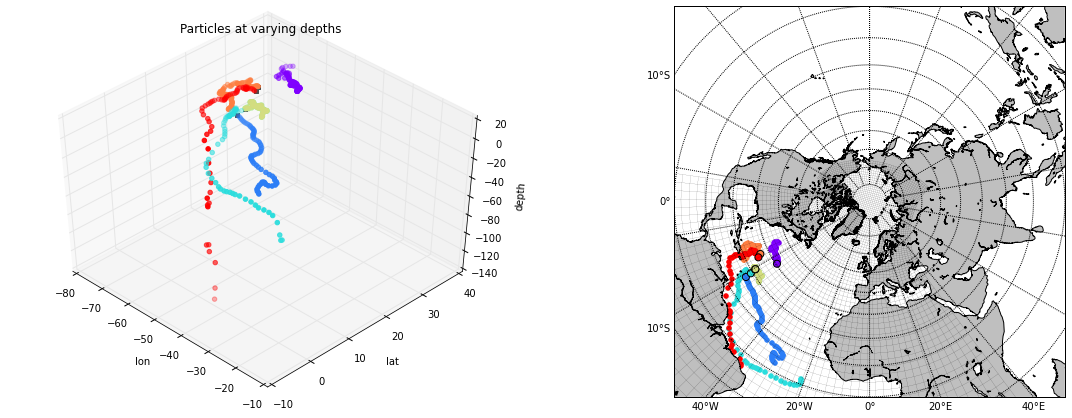

In [18]:
# 3D
n = np.arange(7)
colors = cm.rainbow(np.linspace(0, 1, len(n)))

fig = plt.figure(figsize=(20,7))
ax = ax2 = fig.add_subplot(1, 2, 1, projection='3d')

for N,c in zip(n,colors):
    ax.scatter(rd_lont[1:,N],rd_latt[1:,N],rd_dept[1:,N],color=c) 
    ax.scatter(rd_lont[0,N],rd_latt[0,N],rd_dept[0,N],color='0.30',marker='s')
       
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('depth')
ax.set_title('Particles at varying depths')
ax.view_init(elev=45, azim=-45)



ax1 = fig.add_subplot(122)
m = Basemap(projection='npstere',boundinglat=0,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
tracex,tracey=m(rd_lont,rd_latt)
for N,c in zip(n,colors):
    m.scatter(tracex[1:,N],tracey[1:,N],marker='o',color=c)
m.scatter(tracex[0,:],tracey[0,:],c=colors,s=50)
plt.show()